In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [68]:
df = pd.read_csv("./autos.csv" , encoding = "ISO-8859-1")
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [69]:
df.tail(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07
49999,2016-03-14 00:42:12,Opel_Vectra_1.6_16V,privat,Angebot,"$1,250",control,limousine,1996,manuell,101,vectra,"150,000km",1,benzin,opel,nein,2016-03-13 00:00:00,0,45897,2016-04-06 21:18:48


In [70]:
df.drop(['dateCrawled', 'dateCreated', 'nrOfPictures', 'postalCode'], axis=1, inplace=True)
columns_to_check = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']
for col in columns_to_check:
    df[col] = df[col].replace('UNKNOWN', np.nan)

In [71]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].describe()

,yearOfRegistration,powerPS,monthOfRegistration
count,50000.000000,50000.000000,50000.000000
mean,2005.073280,116.355920,5.723360
std,105.712813,209.216627,3.711984
min,1000.000000,0.000000,0.000000
25%,1999.000000,70.000000,3.000000
50%,2003.000000,105.000000,6.000000
75%,2008.000000,150.000000,9.000000
max,9999.000000,17700.000000,12.000000


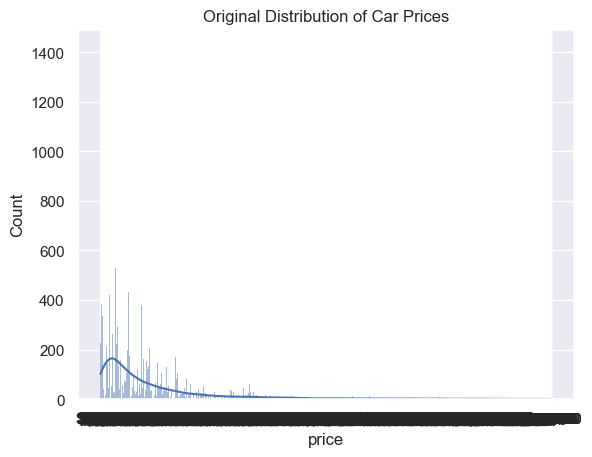

In [72]:
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Original Distribution of Car Prices')
plt.show()

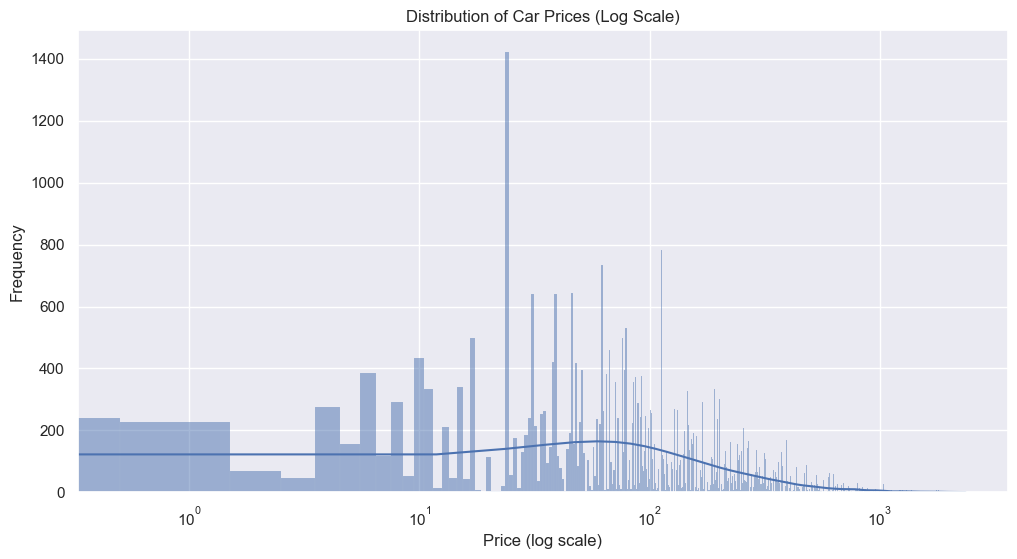

In [73]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.xscale('log')  
plt.title('Distribution of Car Prices (Log Scale)')
plt.xlabel('Price (log scale)')
plt.ylabel('Frequency')
plt.show()



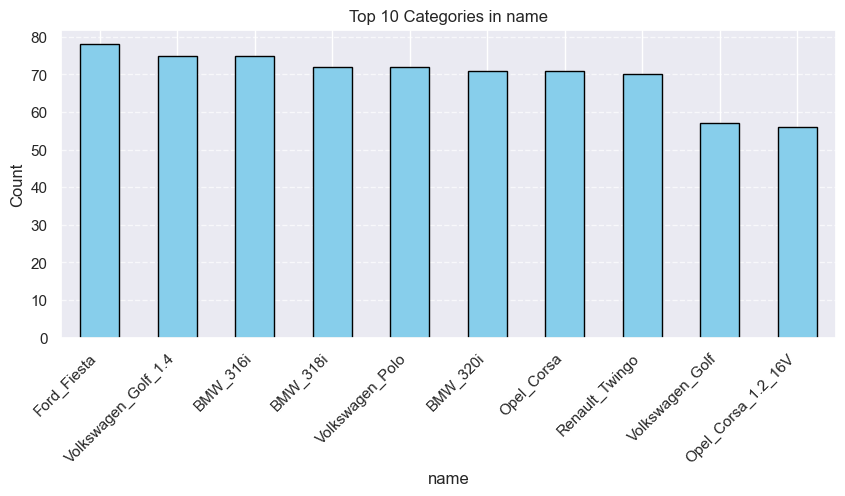

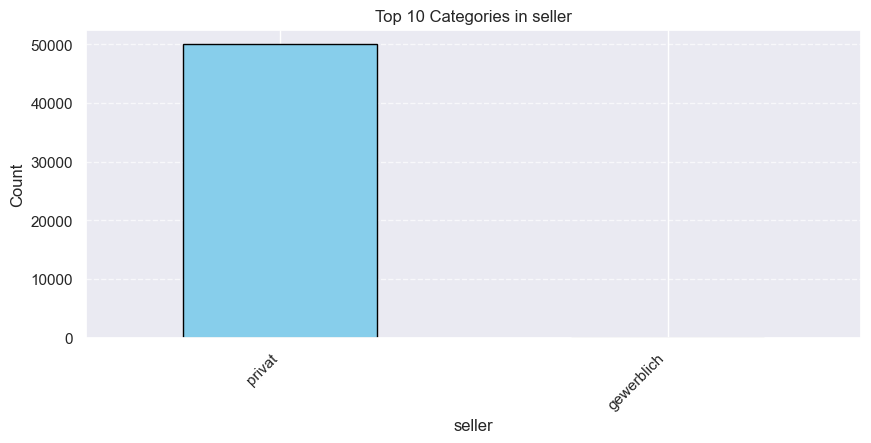

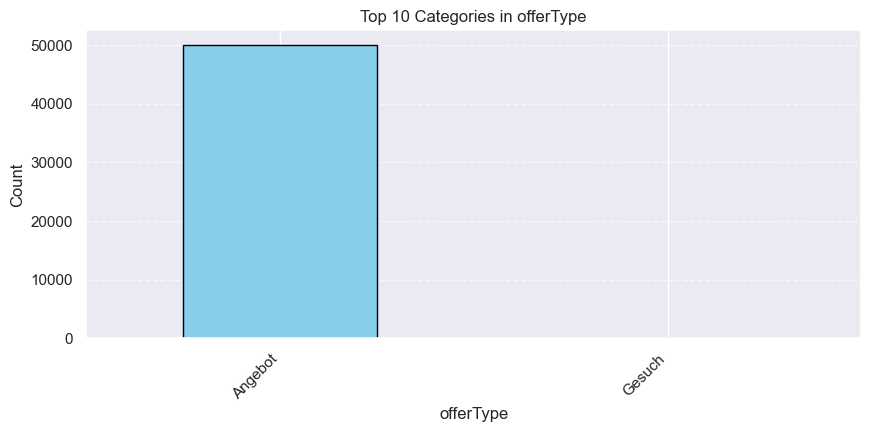

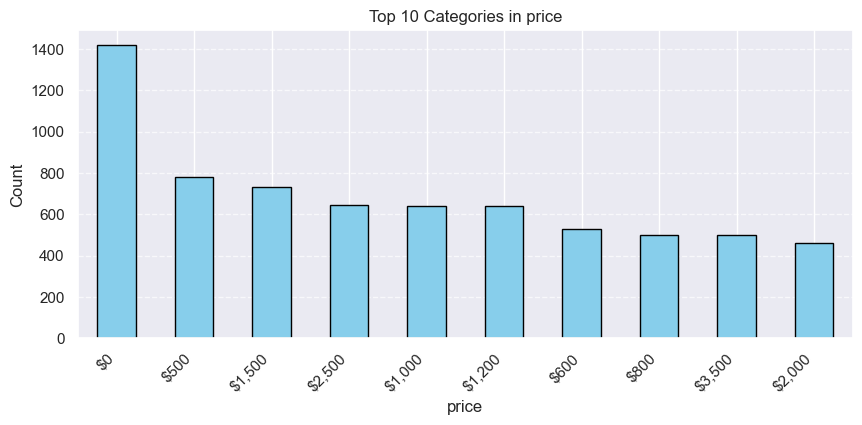

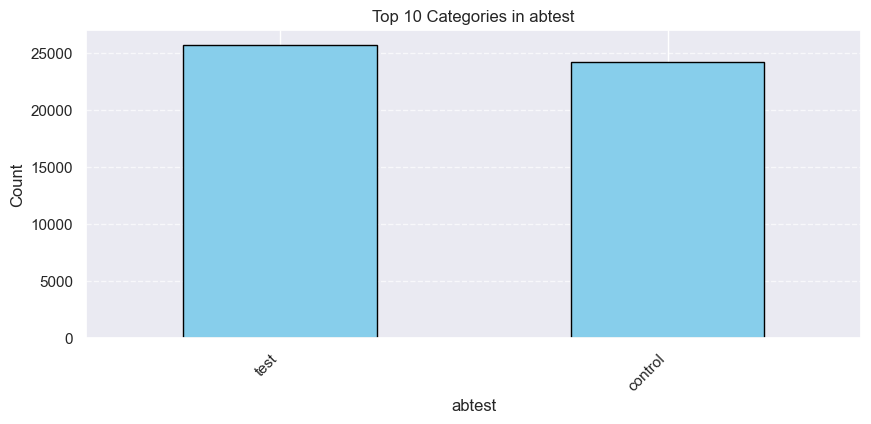

In [74]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols[:5]:
    plt.figure(figsize=(10, 4))
    
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Top 10 Categories in {col}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    

In [75]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

In [76]:
df.head(5)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen
0,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-04-06 06:45:54
2,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-04-06 20:15:37
3,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-15 03:16:28
4,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 14:38:50
5,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-04-06 09:45:21


<Axes: >

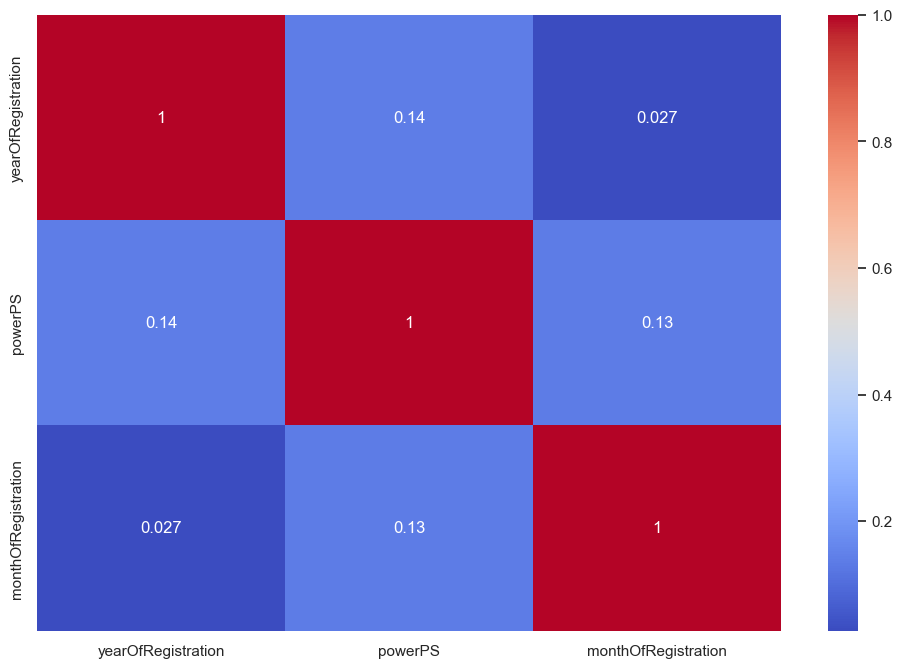

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Distribution of Car Prices by Vehicle Type')

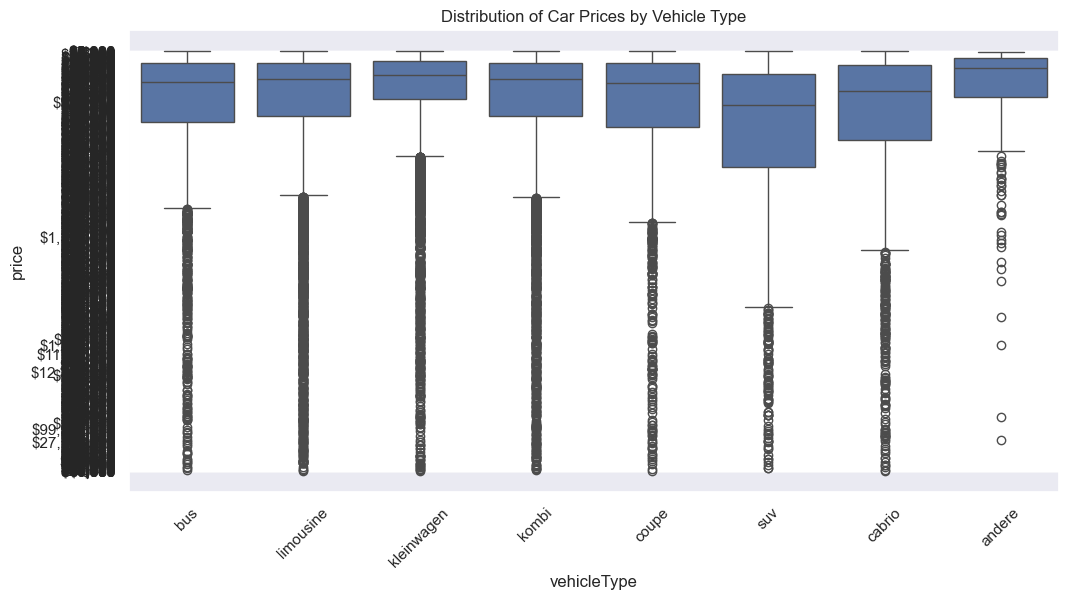

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='vehicleType', y='price', data=df)

plt.xticks(rotation=45)

plt.title("Distribution of Car Prices by Vehicle Type")


Text(0.5, 1.0, 'Distribution of Car Prices by Vehicle Type')

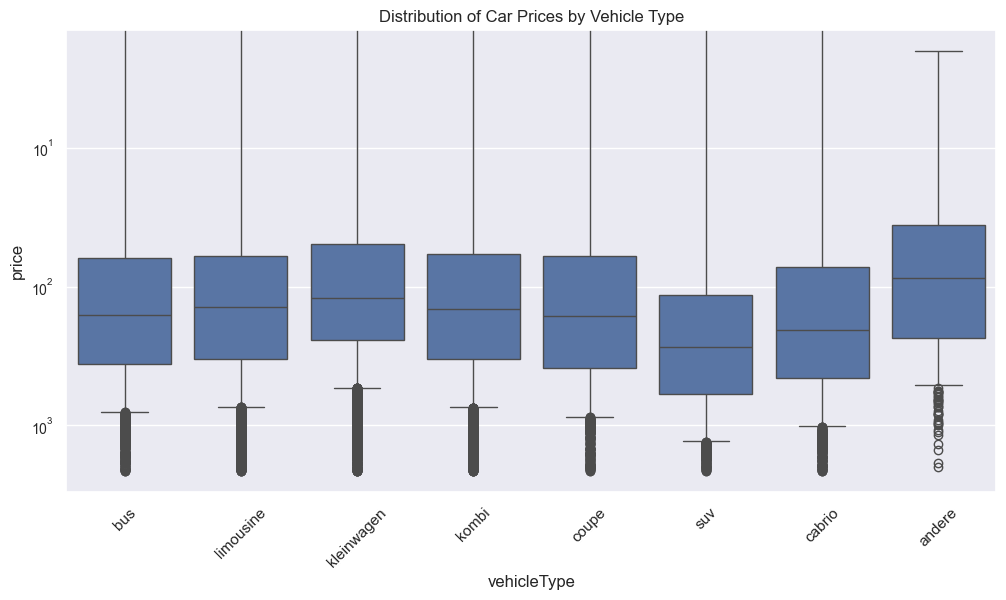

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='vehicleType', y='price', data=df)

plt.xticks(rotation=45)
plt.yscale('log') 
plt.tick_params(axis='y', labelsize=10) 

plt.title("Distribution of Car Prices by Vehicle Type")

Text(0.5, 1.0, 'Heatmap of Vehicle Type vs. Fuel Type')

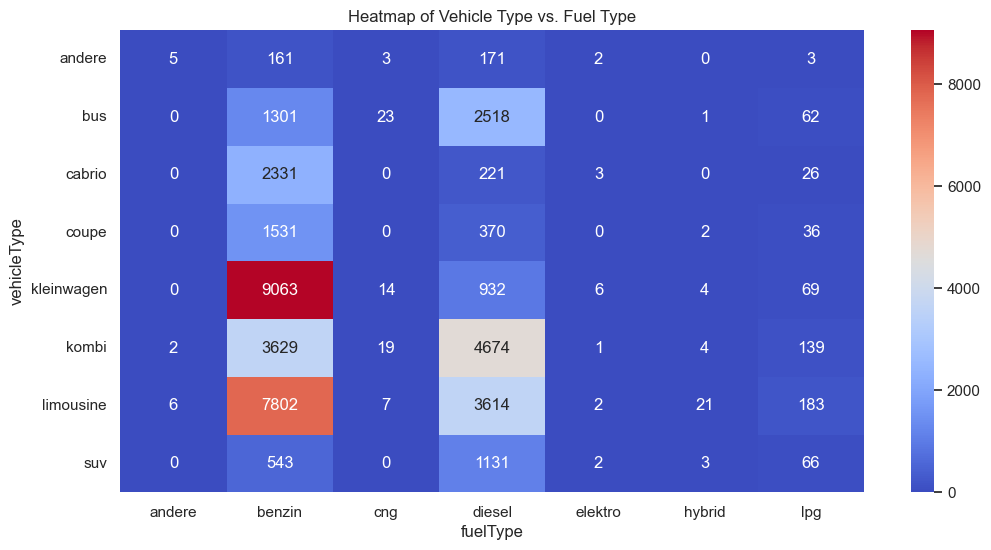

In [79]:
cross_tab = pd.crosstab(df['vehicleType'], df['fuelType'])

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')

plt.title("Heatmap of Vehicle Type vs. Fuel Type")
